<h1> Unit 8 Homework</h1>
<h3> W203 Statistics for Data Science </h3>

Student Name: Kevin Hartman

Section Number: 4

** Data: ** The file GPA1.RData contains data from a 1994 survey of MSU students.  The survey was conducted by Christopher Lemmon, a former MSU undergraduate, and provided by Wooldridge.

** Context: ** The skipped variable represents the average number of lectures each respondent skips per week.  You are interested in testing whether MSU students skip over 1 lecture per week on the average.

**1.0: ** Examine the skipped variable and argue whether or not a t-test is valid for this scenario.

In [1]:
load("GPA1.RData")

In [2]:
ls()

[1] "data" "desc" "self"

In [3]:
desc

variable,label
age,in years
soph,=1 if sophomore
junior,=1 if junior
senior,=1 if senior
senior5,=1 if fifth year senior
male,=1 if male
campus,=1 if live on campus
business,=1 if business major
engineer,=1 if engineering major
colGPA,MSU GPA


In [8]:
head(data)

age,soph,junior,senior,senior5,male,campus,business,engineer,colGPA,⋯,greek,car,siblings,bgfriend,clubs,skipped,alcohol,gradMI,fathcoll,mothcoll
21,0,0,1,0,0,0,1,0,3.0,⋯,0,1,1,0,0,2,1.0,1,0,0
21,0,0,1,0,0,0,1,0,3.4,⋯,0,1,0,1,1,0,1.0,1,1,1
20,0,1,0,0,0,0,1,0,3.0,⋯,0,1,1,0,1,0,1.0,1,1,1
19,1,0,0,0,1,1,1,0,3.5,⋯,0,0,1,0,0,0,0.0,0,0,0
20,0,1,0,0,0,0,1,0,3.6,⋯,0,1,1,1,0,0,1.5,1,1,0
20,0,0,1,0,1,1,1,0,3.0,⋯,0,1,1,0,0,0,0.0,0,1,0


[1] 141

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   1.076   2.000   5.000 

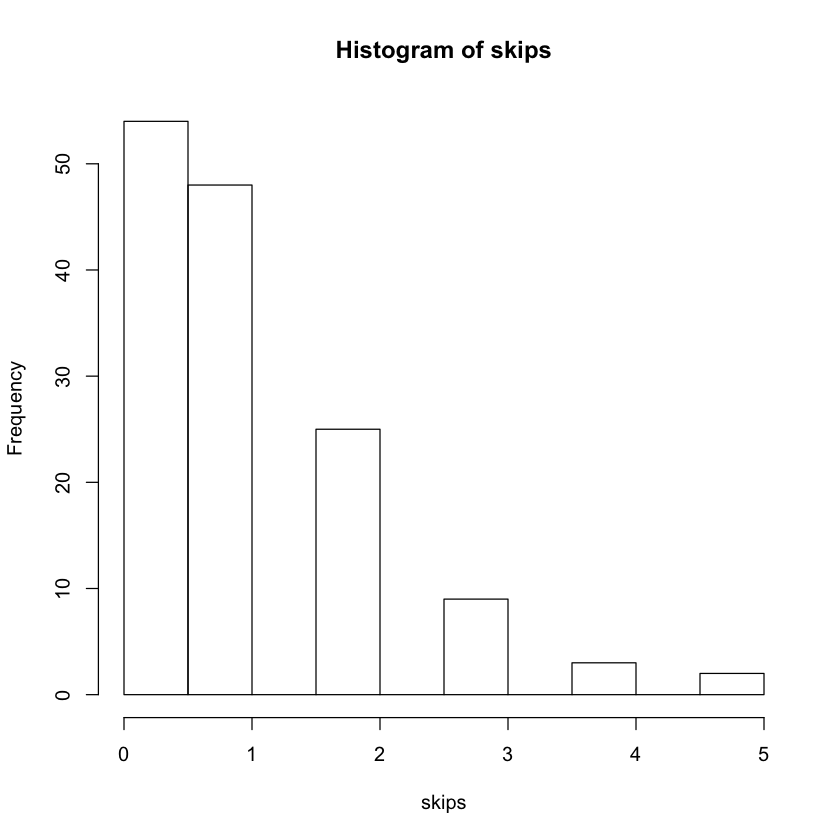

In [9]:
skips<-data$skipped
length(skips)
summary(skips)
hist(skips)

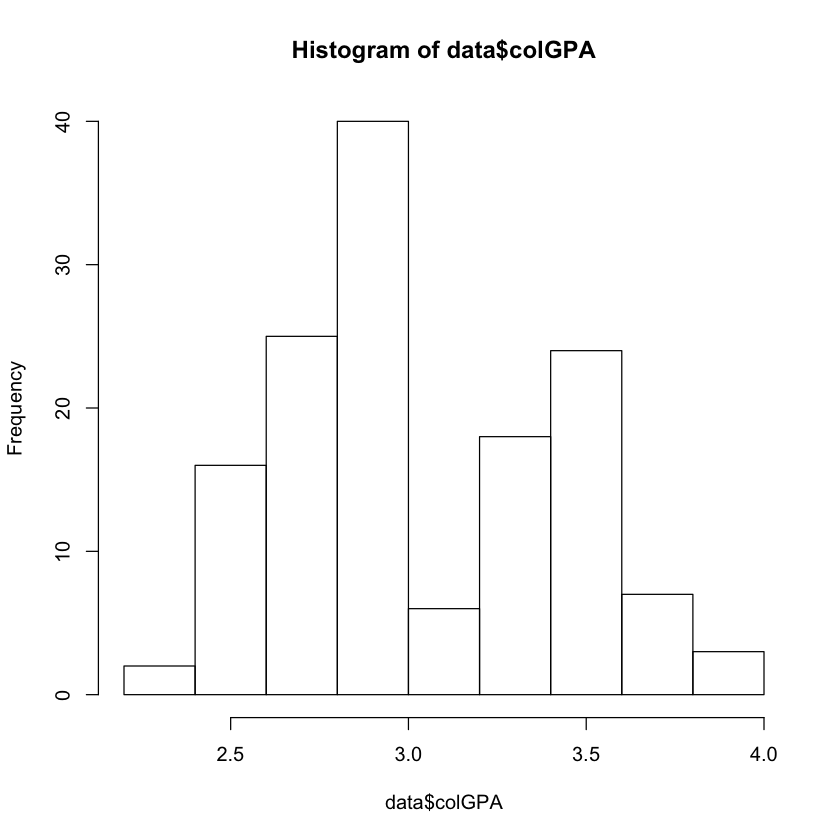

In [41]:
hist(data$colGPA)

 num [1:1000] 1.112 0.965 1.181 0.947 0.897 ...


[1] "Standard Deviation 0.089939775916203"

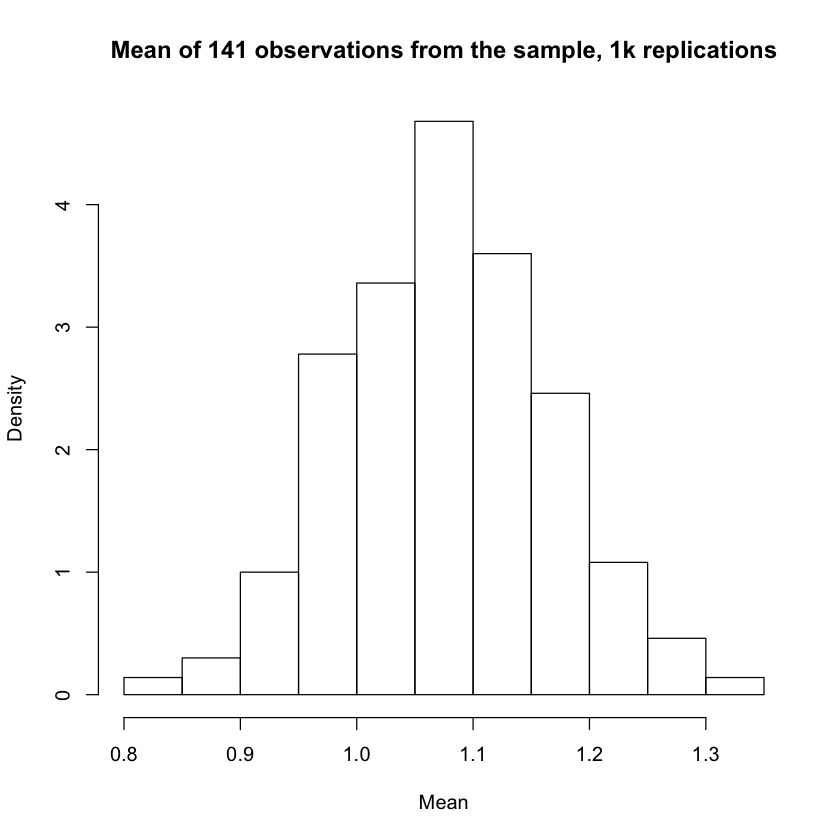

In [37]:
nobs <- 141
relp_n <- 1000

cumul_means<-rep(0, relp_n)

for (i in 1:relp_n)
    {
    cumul_means[i]<-mean(sample(skips, nobs, replace = TRUE))
    }
str(cumul_means)

paste('Standard Deviation',sd(cumul_means))
hist(cumul_means, main = "Mean of 141 observations from the sample, 1k replications"
                  , freq = FALSE, xlab = "Mean")



>The responses in the sample range from 0 to 5, with mode being 0. 
The mean is greater than the median and we can see from the histogram there is positive skew.
We can also see that the histogram is not "normal" in the bell-shaped sense, but, we do have plenty of observations (>30) which means we can invoke the central limit theorem (the proof of which is above) and use a normal Z test. But when n is sufficiently large the difference between a t-test and z-test is negligible. So yes, we can use the t-test.


**2.0: ** How would your answer to part a change if Mr. Lemmon selected dormitory rooms at random, then interviewed all occupants in the rooms he selected?

>I think the approach needs a little more sampling rigor considering all the demographic data being collected. We need to make sure we're taking samples from every location available to get a good distribution, e.g. male dorms and female dorms and expensive dorms and cheaper dorms. Dorm locations also vary by their proximity to fields of study. So you could be sampling at just the business school location. You're also missing the off-campus people who don't live in the dorms. My answer would be no, not enough randomness anymore. 

**3.0: ** Provide an argument for why you should choose a 2-tailed test in this instance, even if you are hoping to demonstrate that MSU students skip more than 1 lecture per week.

> I think we would have to make a strong argument on why a 1-tail test should be used instead. The 2-tailed test is the default. TO go with a 1-tail test you have to make a really convincing argument, and hoping to demonstrate MSU students skip more than 1 lecture per week isn't one of them. That's no longer being objective. It's being manipulative.


**4.0: ** Conduct the t-test using the t.test function and interpret every component of the results.

In [107]:
t.test(skips, mu=1)


	One Sample t-test

data:  skips
t = 0.83142, df = 140, p-value = 0.4072
alternative hypothesis: true mean is not equal to 1
95 percent confidence interval:
 0.8949445 1.2575377
sample estimates:
mean of x 
 1.076241 


\begin{align*}
&\text{One Sample t-test } & &\text{This means we're testing our sample against a hypothesized value} \\
&\text{data: skips} & &\text{This is a vector of the sample data we're testing} \\
&\text{t = 0.83142} & &\text{This is the value of our test statistic for the 2-tail test } t_{(\frac{\alpha}{2},{n-1})}\\
&\text{df = 140} & &\text{The Degrees of freedom (number of observations - 1) for the t curve. The lower the df, the thicker the tails} \\
&\text{p-value = 0.4072} & &\text{The probability we'll get values at least as extreme as those in our sample if our hypothesis is true} \\
&\text{alternative hypothesis} & &\text{Our hypothesis is that the mean is equal to 1 and the alternative is that it is less than or greater than 1} \\
&&&\text{This also means we are running a two-tailed test.} \\
&\text{95 percent confidence interval} & &\text{If the mean in the null hypothesis (1) falls outside the interval of 0.8949 and 1.2575, }\\
&&&\text{then we can reject the null hypothesis with 95% confidence } \\
&\text{mean of x} & &\text{This is the mean of the sample, 1.076} \\
\end{align*}

**5.0: ** Show how you would compute the t-statistic and p-value manually (without using t.test), using the pt function in R.

In [60]:
xbar = mean(skips)
s = sd(skips)
n = length(skips)
mu = 1

t = (xbar - mu)/(s / sqrt(n))
p_value = 2 * (1-pt(t, 140))

paste('test statistic', t)
paste('p-value', p_value)

[1] "test statistic 0.831415581558769"

[1] "p-value 0.40715469213578"

**6.0: ** Construct a 99% confidence interval for the mean number classes skipped by MSU students in a week.

In [71]:
(mean(xbar) + qt( c(0.005, .995), n-1) * s / sqrt(n))

[1] 0.8367745 1.3157078

In [72]:
t.test(skips, mu=1, conf.level=0.99)


	One Sample t-test

data:  skips
t = 0.83142, df = 140, p-value = 0.4072
alternative hypothesis: true mean is not equal to 1
99 percent confidence interval:
 0.8367745 1.3157078
sample estimates:
mean of x 
 1.076241 


** 7.0: ** Can you say that there is a 99% chance the population mean falls inside your confidence interval?

>No, what you can say is that 99 times out of 100 the confidence intervals will engulf your population mean if you ran the experiment multiple times